italicized text

In [1]:
#%% 
#@title Viscoporoelastic model

import sys
print(sys.version)

import numpy as np

# for below must mount drive
#from google.colab import drive
#drive.mount('/content/drive')
new_path = "/content/drive/MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computations/SpectorLog/Yerrabelli-Spector-Porelastic-Model-Code"
if new_path not in sys.path:
  sys.path.insert(0,new_path)



3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Time taken in sec: 0.03866744041442871


,Value,Category
eps0,0.10,Constant
strain_rate,0.10,Constant
Vrz,0.24,Constant
Ezz,19.19,Constant
c,0.00,FittedParam
tau1,0.00,FittedParam
tau2,0.00,FittedParam
tg,40.62,FittedParam
Vrtheta,0.75,FittedParam
Err,8.49,FittedParam


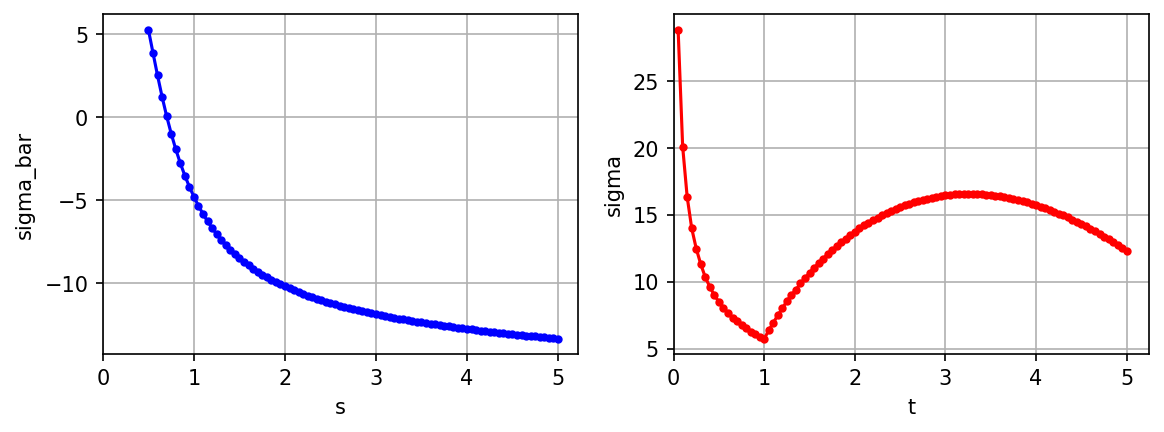

In [3]:
#%%

#%%
from src.euler_inversion import euler_inversion
from src.viscoporoelastic_model import ViscoporoelasticModel
import time as timer
t1=timer.time();

#@markdown Predefined constants
ViscoporoelasticModel.eps0 = 0.1 #@param {type:"number"} ; # 10 percent
ViscoporoelasticModel.strain_rate = 0.1 #@param {type:"number"} ; # 1 percent per s (normally 1#/s)
## Below are directly determined by the mesh deformation part of the
## experiment (see our paper with Daniel).  -Dr. Spector
ViscoporoelasticModel.Vrz = 0.24 #@param {type:"number"} ; # Not actually v, but greek nu (represents Poisson's ratio)
ViscoporoelasticModel.Ezz =   19.19#@param {type:"number"} ; # Note- don't mix up Ezz with epszz

vpe = ViscoporoelasticModel()

#@markdown Fitted parameters (to be determined by experimental fitting to the unknown material)
## Fitted parameters (to be determined by experimental fitting to
# the unknown material)
vpe.c =   0#@param {type:"number"} ;
vpe.tau1 =  0#@param {type:"number"} ;
vpe.tau2 =  0#@param {type:"number"} ;
#tau = [tau1, tau2];
#tau = [1 1];
vpe.tg=40.62 #@param {type:"number"}; #in units of s   # for porosity_sp == 0.5
vpe.Vrtheta =  0.75#@param {type:"number"}; # Not actually v, but greek nu (represents Poisson's ratio)
vpe.Err =  8.49#@param {type:"number"};

# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
times=np.array([2,3])
times = np.arange(0.05, 5.05, 0.05)
input_times = times
plot_times = times
func = vpe.laplace_value
func_name = {"t":"sigma(t)", "s":"sigma_bar(s)"}
x_names   = {"t":"t", "s":"s"}
s_vals = np.arange(0.5, 5.05, 0.05)

import time as timer
t1=timer.time();
inverted_vals=euler_inversion(func, input_times)
t2=timer.time()-t1
print("Time taken in sec:", t2)

#%%
# Non-positive s values give an error "invalid value encountered in sqrt"
laplace_vals = func(s_vals)

##%%
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2)
fig.set_figwidth(9)
fig.set_figheight(3)
fig.set_dpi(150)

axs[0].plot(s_vals, laplace_vals, ".-b")
axs[0].set_xlabel(x_names["s"])
# theoretically, there should be no limit on s, but non-positive values throw an error in the function
axs[0].set_xlim([0, None])
axs[0].set_ylabel(func_name["s"])
axs[0].grid()

axs[1].plot(plot_times, inverted_vals, ".-r")
axs[1].set_xlabel(x_names["t"])
axs[1].set_xlim([0, None])
axs[1].set_ylabel(func_name["t"])    
axs[1].grid()

#axs[0].show()

fig.show()


# Print out the used values
vpe.get_predefined_constants()
import pandas as pd
x1=np.arange(10)
y1=np.random.random(10)
x2=np.arange(4,12)
y2=np.random.random(8)
df1 = pd.DataFrame({'Constant':ViscoporoelasticModel.get_predefined_constant_names(),'Value':ViscoporoelasticModel.get_predefined_constants()})
df2 = pd.DataFrame({'Fitted':vpe.get_fitted_parameter_names(),'Value':vpe.get_fitted_parameters()})
df3 = pd.DataFrame({'Value':ViscoporoelasticModel.get_predefined_constants()+vpe.get_fitted_parameters(),"Category":ViscoporoelasticModel.get_var_categories()}, index=ViscoporoelasticModel.get_predefined_constant_names()+vpe.get_fitted_parameter_names())
df3

Yuan, D., Somers, S.M., Grayson, W.L. et al. A Poroelastic Model of a Fibrous-Porous Tissue Engineering Scaffold. Sci Rep 8, 5043 (2018). https://doi.org/10.1038/s41598-018-23214-8

# Figure 1
<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41598-018-23214-8/MediaObjects/41598_2018_23214_Fig1_HTML.jpg?as=webp">

# Table 1
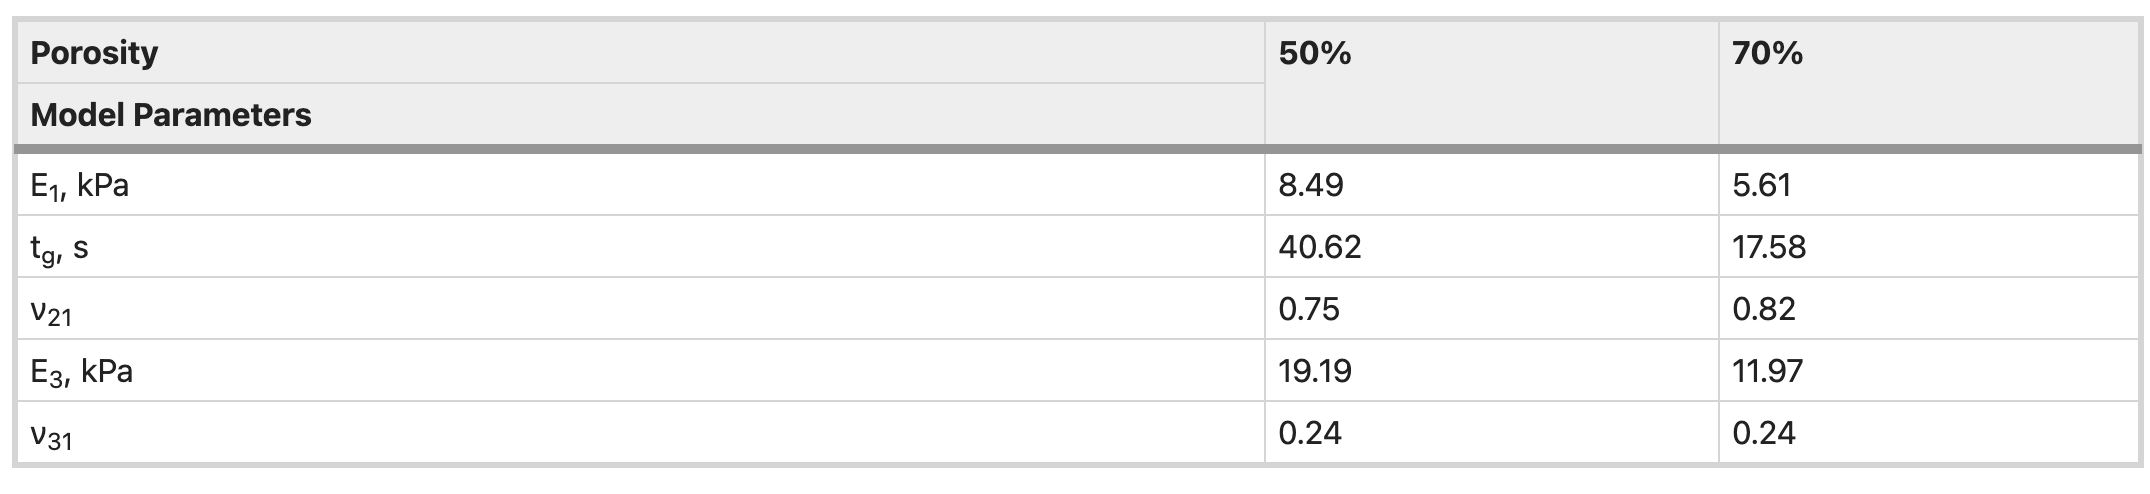

Time taken in sec: 0.011343002319335938
       alpha     tg  strain_rate      t0
value    0.5  0.007       0.0001  1000.0


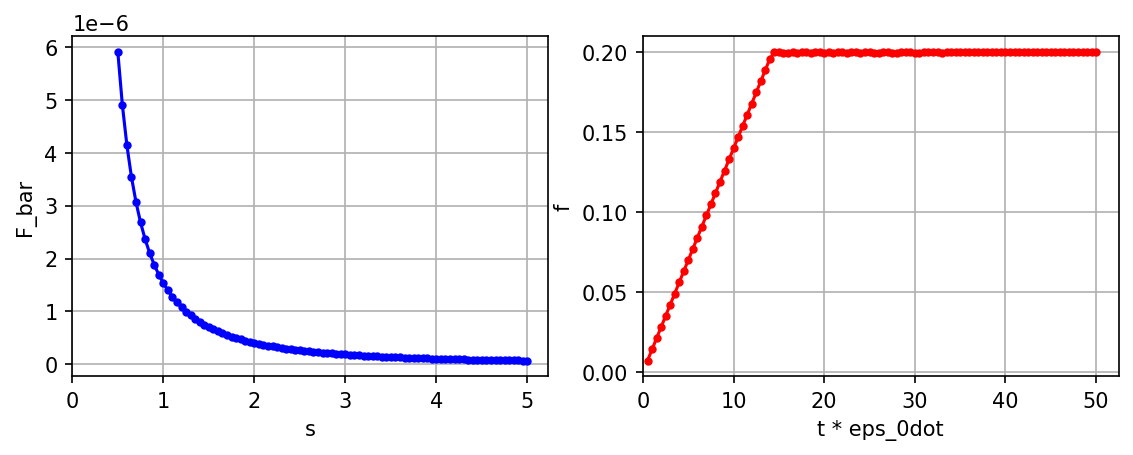

In [18]:
from src.viscoporoelastic_model import TestModel
# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
times=np.array([2,3])
times = np.arange(0.05, 5.05, 0.05)*100000

tm = TestModel()
func = tm.laplace_value
input_times = times
plot_times  = times * tm.strain_rate
func_name = {"t":"f(t)", "s":"F_bar(s)"}
x_names   = {"t":"t * eps_0dot", "s":"s"}
s_vals = np.arange(0.5, 5.05, 0.05)


import time as timer
t1=timer.time();
inverted_vals=euler_inversion(func, input_times)
t2=timer.time()-t1
print("Time taken in sec:", t2)

#%%
# Non-positive s values give an error "invalid value encountered in sqrt"
laplace_vals = func(s_vals)

##%%
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2)
fig.set_figwidth(9)
fig.set_figheight(3)
fig.set_dpi(150)

axs[0].plot(s_vals, laplace_vals, ".-b")
axs[0].set_xlabel(x_names["s"])
# theoretically, there should be no limit on s, but non-positive values throw an error in the function
axs[0].set_xlim([0, None])
axs[0].set_ylabel(func_name["s"])
axs[0].grid()

axs[1].plot(plot_times, inverted_vals, ".-r")
axs[1].set_xlabel(x_names["t"])
axs[1].set_xlim([0, None])
axs[1].set_ylabel(func_name["t"])    
axs[1].grid()

#axs[0].show()

fig.show()

vars={key:value for key,value in TestModel.__dict__.items() if not key.startswith("__") and not callable(value)}
print(pd.DataFrame(vars,index=["value"]))

/content/drive/MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computations/SpectorLog/Yerrabelli-Spector-Porelastic-Model-Code/src/viscoporoelastic_model.py:239: RuntimeWarning: invalid value encountered in multiply
  F = eps * (3*I0(sqrt(s))-8*alpha*I1(sqrt(s))/sqrt(s)) / (I0(sqrt(s))-2*alpha*I1(sqrt(s))/sqrt(s))
/content/drive/MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computations/SpectorLog/Yerrabelli-Spector-Porelastic-Model-Code/src/viscoporoelastic_model.py:239: RuntimeWarning: invalid value encountered in true_divide
  F = eps * (3*I0(sqrt(s))-8*alpha*I1(sqrt(s))/sqrt(s)) / (I0(sqrt(s))-2*alpha*I1(sqrt(s))/sqrt(s))


Time taken in sec: 0.22121167182922363
       vs     tg  ...      a                 get_predefined_constants
value   0  0.007  ...  0.003  <staticmethod object at 0x7fd3804be290>

[1 rows x 6 columns]


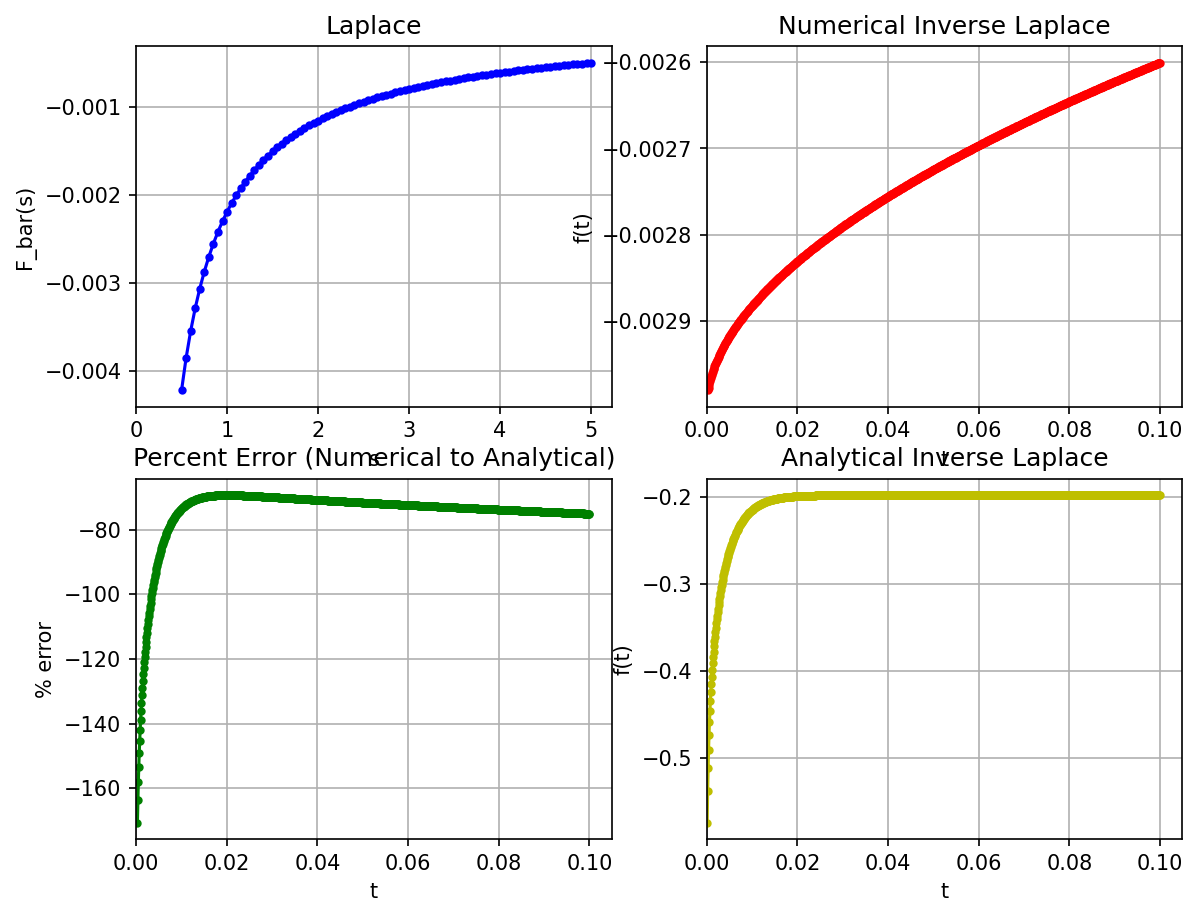

In [23]:
from src.viscoporoelastic_model import TestModel2
# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
times=np.arange(0.1,100,0.1)/10000.0*10
#times = np.arange(0.05, 5.05, 0.05)

tm = TestModel2()
func = tm.laplace_value
anal_inv_func = tm.inverted_value
input_times = times
plot_times  = times
func_name = {"t":"f(t)", "s":"F_bar(s)"}
x_names   = {"t":"t", "s":"s"}
s_vals = np.arange(0.5, 5.05, 0.05)


import time as timer
t1=timer.time();
inverted_vals=euler_inversion(func, input_times)
t2=timer.time()-t1
print("Time taken in sec:", t2)

#%%
# Non-positive s values give an error "invalid value encountered in sqrt"
laplace_vals = func(s_vals)
inverted_vals_analytical = None if anal_inv_func is None else anal_inv_func(input_times)


##%%
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2)
fig.set_figwidth(9)
fig.set_figheight(3*2+1)
fig.set_dpi(150)

axs[0,0].plot(s_vals, laplace_vals, ".-b")
axs[0,0].set_xlabel(x_names["s"])
# theoretically, there should be no limit on s, but non-positive values throw an error in the function
axs[0,0].set_xlim([0, None])
axs[0,0].set_ylabel(func_name["s"])
axs[0,0].grid()
axs[0,0].title.set_text("Laplace")

axs[0,1].plot(plot_times, inverted_vals, ".-r")
axs[0,1].set_xlabel(x_names["t"])
axs[0,1].set_xlim([0, None])
axs[0,1].set_ylabel(func_name["t"])    
axs[0,1].grid()
axs[0,1].title.set_text("Numerical Inverse Laplace")

if inverted_vals_analytical is not None:
  axs[1,1].plot(plot_times, inverted_vals_analytical, ".-y")
  axs[1,1].set_xlabel(x_names["t"])
  axs[1,1].set_xlim([0, None])
  axs[1,1].set_ylabel(func_name["t"])    
  axs[1,1].grid()
  axs[1,1].title.set_text("Analytical Inverse Laplace")


  axs[1,0].plot(plot_times, (inverted_vals-inverted_vals_analytical)/inverted_vals, ".-g")
  axs[1,0].set_xlabel(x_names["t"])
  axs[1,0].set_xlim([0, None])
  #axs[1,0].set_ylabel(func_name["t"]) 
  axs[1,0].set_ylabel("% error")    
  axs[1,0].grid()
  axs[1,0].title.set_text("Percent Error (Numerical to Analytical)")



#axs[0,0].show()

fig.show()

vars={key:value for key,value in TestModel2.__dict__.items() if not key.startswith("__") and not callable(value)}
print(pd.DataFrame(vars,index=["value"]))

In [6]:
tm.inverted_value(2)

-0.19792033717615695